# Анализ бизнес показателей компании

Описание проекта:
---

Procrastinate Pro+ - заказчик. Компания вкладывается в рекламу, но терпит убытки последние несколько месяцев.


**Цель: выявить причины неэффективности привлечения пользователей и дать рекомендации для отдела маркетинга.**

Данные для анализа: информация о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Задачи:
---

1. Откуда приходят пользователи и какими устройствами они пользуются
2. Сколько стоит привлечение пользователей из различных рекламных каналов
3. Сколько денег приносит каждый клиент
4. Когда расходы на привлечение клиента окупаются
5. Какие факторы мешают привлечению клиентов

Описание данных:
---

1. Файл visits_info_short.csv - информациия о посещениях сайта, его структура:
    - User Id — уникальный идентификатор пользователя,
    - Region — страна пользователя,
    - Device — тип устройства пользователя,
    - Channel — идентификатор источника перехода,
    - Session Start — дата и время начала сессии,
    - Session End — дата и время окончания сессии.


2. Файл orders_info_short.csv — информация о заказах, его структура:
    - User Id — уникальный идентификатор пользователя,
    - Region — страна пользователя,
    - Device — тип устройства пользователя,
    - Channel — идентификатор источника перехода,
    - Session Start — дата и время начала сессии,
    - Session End — дата и время окончания сессии.


3. Файл costs_info_short.csv — информация о расходах на рекламу. Его структура: 
    - User Id — уникальный идентификатор пользователя,
    - Event Dt — дата и время покупки,
    - Revenue — сумма заказа.
    - Структура costs_info_short.csv:
    - dt — дата проведения рекламной кампании,
    - Channel — идентификатор рекламного источника,
    - costs — расходы на эту кампанию.

## Шаг 1. Загрузка и подготовка данных к анализу.

In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

In [2]:
#Выгрузим информацию 
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
#Посмотрим на содержимое файлов
#Выявим дубликаты, если такие имеются
visits.info()
visits.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


0

In [4]:
#Для удобства работы переименуем столбцы
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [5]:
#Проведем такие же действия с остальными файлами
orders.info()
orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


0

In [6]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [7]:
costs.info()
costs.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


0

In [8]:
costs.columns =['dt', 'channel', 'costs']

In [9]:
#Приведем данные с датой и временем к соответствующему типу данных 
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [10]:
#Проверим, что получилось
display(visits.head(5))
display()
display(orders.head(5))
display()
display(costs.head(5))

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Вывод**

В данных о визитах, заказах и рекламных расходах не выявлено дубликатов и пропусков. Все названия столбцов в датафреймах приведены к нижнему регистру. Столбцы с датой и временем приведены к datetime64 типу данных.

---

## Шаг 2. Создадим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [11]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [12]:

# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [13]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [15]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 


In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графикbов
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Шаг 3. Исследовательский анализ данных.

**Пункт 1.** Составим профили пользователей, определим минимальную и максимальную даты привлечения пользователей.

In [19]:
#Для создания профилей воспользуемся функцией get_profiles
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [20]:
#Определим min и max даты привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

min_analysis_date, max_analysis_date

(datetime.date(2019, 5, 1), datetime.date(2019, 10, 27))

Для того, чтобы проще было делить пользователей на когорты, зарнее были составлены их профили. Структура таблицы profiles: 
- user_id - id пользователя;
- first_ts - дата и время начала сессии;
- channel - канал  привлечения пользователя;
- device - устройство первого посещения;
- region - страна, из которой выполнялся первый переход на сайт;
- dt - дата первого посещения;
- month - месяц первого посещения; 
- payer - добавили признак платящих пользователей, благодаря таблице 'orders';
- acquisition_cost - нашли стоимость привлечения каждого из пользователей, благодаря таблице 'costs'.

После создания профилей пользователей, мы смогли определить минимальную дату привлечения пользователей - 01.05.2019 и максимальную - 27.10.2019. 

---

**Пункт 2.** Выясним: 
- 2.1. Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны. 
- 2.2. Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- 2.3. Какие рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


In [21]:
#Создадим функцию для подсчёта доли платящих пользователей по отдельному признаку

def payer_segment(dt, dim=[]):
    new_data = dt.groupby(dim) \
                 .agg({'user_id': 'nunique', 'payer': 'mean'}) \
                 .rename(columns={'user_id': 'users_qt', 'payer': 'payer_rate'}) \
                 .sort_values(by=['payer_rate'], ascending=False)
    
    new_data = new_data.style.background_gradient('coolwarm')    

    #формируем сводную таблицу
    table_plot = profiles.pivot_table(
            index='dt', 
            columns=dim, 
            values='payer',  
            aggfunc='mean' 
    ).fillna(0)

    # для каждого столбца применяем скользящее среднее
    for column in table_plot.columns.values:
        table_plot[column] = table_plot[column].rolling(4).mean()
    
    #строим графики по признаку
    table_plot.plot(figsize=(15, 5), grid=True)
    plt.xlabel('Дата привлечения')
    plt.show()
    
    return new_data

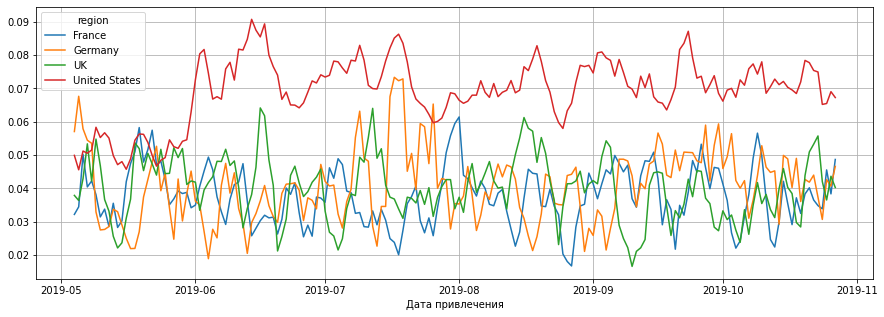

,users_qt,payer_rate
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


In [22]:
#Применим функцию payer_segment:
#сформируем таблицу, отражающую количество пользователей и долю платящих из каждой страны
#построим график динамики доли платящих пользователей из каждой страны 
payer_segment(profiles, dim=['region'])

География пользовательской аудитории приложения: США, Германия, Великобритания, Франция. У США самые лучший показатель по доли платящих пользователей. По количеству пользователей также лидируют штаты с значительным отрывом. По графику заметно, что в мае 2019 года, доля платящих пользователей в США была порядка 5%, а в начале мая доля платящих была вообще больше по Германии. Данный момент можно поизучать в дальнейшем. Показатели по остальным странам примерно одинаковы. 

---

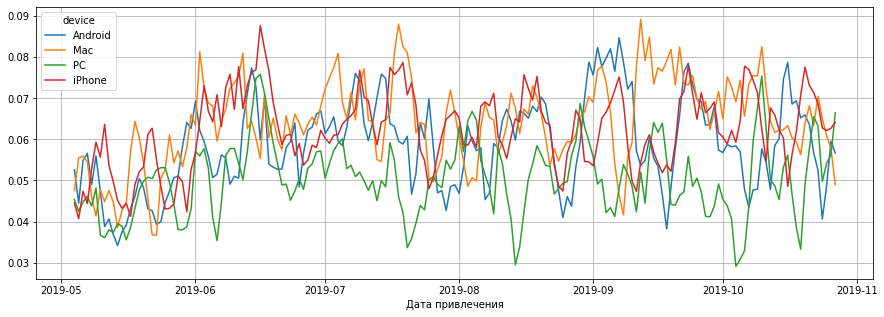

,users_qt,payer_rate
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


In [23]:
#Применим функцию payer_segment:
#сформируем таблицу, отражающую количество пользователей и долю платящих для каждого устройства
#построим график динамики доли платящих пользователей для каждого устройства 
payer_segment(profiles, dim=['device'])

Пользователи используют следующие устройства: Mac, iPhone, Android, PC. Платящие пользователи, покупатели, предпочитают Mac, iPhone, Android. Доля покупателей по этим устройствам варируется 5,9% - 6,4%. А вот персональные компьютеры (PC) покупатели предпочитают в меньшей степени - 5,1%. 

---

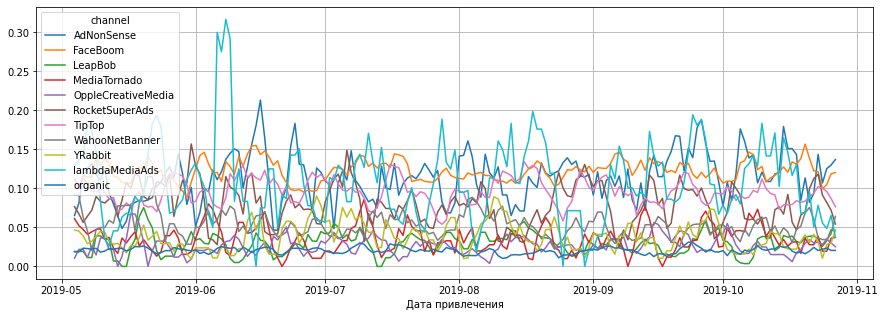

,users_qt,payer_rate
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


In [24]:
#Применим функцию payer_segment:
#сформируем таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения
#построим график динамики доли платящих пользователей для каждого канала привлечения
payer_segment(profiles, dim=['channel'])

Компания использует 11 каналов привлечения пользователей в свое приложение. Большая доля покупателей у следующих каналов: FaceBoom - 12,2%, AdNonSense - 11,3%, lambdaMediaAds - 10,5%. Органический трафик на сайт привлекает самую большую часть пользователей, порядка 56 тыс человек, но они плохо конвертируются в платящих, поэтому доля покупателей по этому каналу наименьшая. На графике виден пик по каналу lambdaMediaAds в начале июня, доля покупателей увеличилась до 30%. В дальнейшем можно изучить это более детально. 

---

**Вывод**
- На данном этапе составлены профили пользователей с подробной информацией по каналам привлечения, устройствам первого посещения и региону, также добавлен признак платящих и не платящих, посчитана стоимость привлечения для каждого пользователя. Также определены минимальная дата привлечения пользователей - 01.05.2019 и максимальная - 27.10.2019. 
- География пользовательской аудитории приложения: США, Германия, Великобритания, Франция. Наибольшая доля покупателей в США - 5%, по остальным странам 3,8% - 4,1%. 
- Пользователи выбирают следующие устройства для посещения приложения: Mac, iPhone, Android, PC. Доля покупателей по устройствам Mac, iPhone, Android варируется 5,9% - 6,4%. А вот персональные компьютеры (PC) покупатели предпочитают в меньшей степени - 5,1%. 
- Компания использует 11 каналов привлечения пользователей в свое приложение. Большая доля покупателей у следующих каналов: FaceBoom - 12,2%, AdNonSense - 11,3%, lambdaMediaAds - 10,5%. Органический трафик на сайт привлекает самую большую часть пользователей, порядка 56 тыс человек, но они плохо конвертируются в платящих, поэтому доля покупателей по этому каналу наименьшая.

## Шаг 4. Маркетинг.

**Пункт 1.** Посчитаем общую сумму расходов на маркетинг.

In [25]:
round(costs.costs.sum(), 2)

105497.3

Общая сумму расходов на маркетинг составила 105497.

---

**Пункт 2.** Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [26]:
#Сгруппируем данные по каналам и посчитаем траты по каждый из них
costs.groupby('channel') \
    .agg({'costs':'sum'}) \
    .sort_values(by='costs', ascending=False) \
    .style.background_gradient('coolwarm') 

,costs
channel,
TipTop,54751.300000
FaceBoom,32445.600000
WahooNetBanner,5151.000000
AdNonSense,3911.250000
OppleCreativeMedia,2151.250000
RocketSuperAds,1833.000000
LeapBob,1797.600000
lambdaMediaAds,1557.600000
MediaTornado,954.480000


Самым дорогим каналом привлечения для компании оказался TipTop. Затраты по нему составили практически 55 тыс - половина маркетингово бюджета. Доля покупателей по этому каналу составила 10% - это четвертый результат по каналам. Затраты по каналу FaceBoom - 32 тыс, доля платящих самая высокая из каналов - 12%. Показатели доли платящих покупателей по лидирующим каналам варьируется 8% - 12%. Однако затраты первых двух сильно отличаются от остальных. Есть основания полагать, что маркетинговая стратегия по этим каналам неэффективна. К примеру, канал lambdaMediaAds: затраты - 1,5 тыс, доля платящих - 10,5%.  

---

**Пункт 3.** Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику, отразим это на одном графике.

In [27]:
#Выделим столбцы с номером месяца и номером недели
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

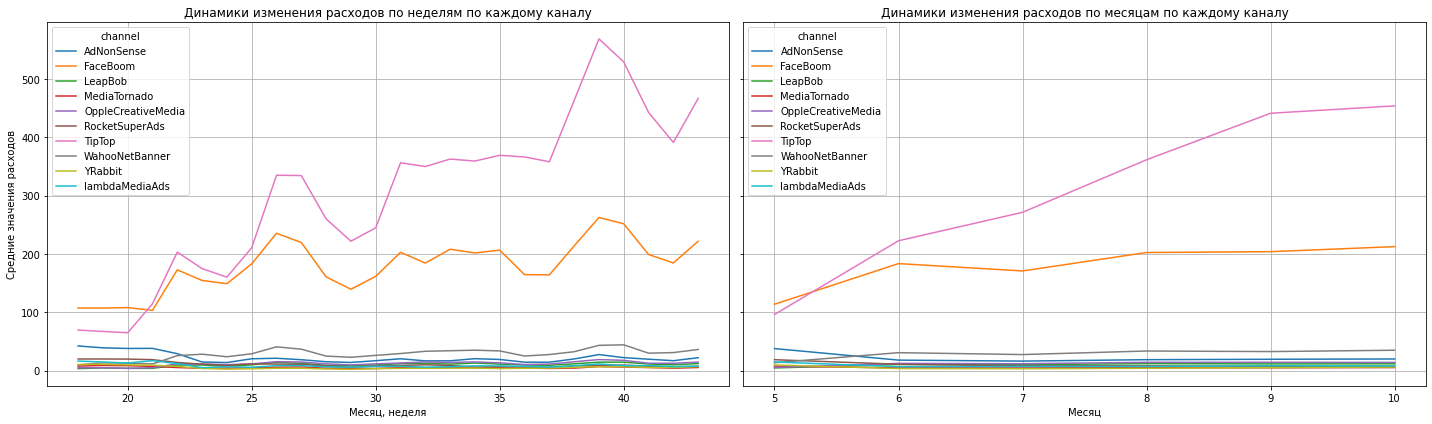

In [28]:
#Построим графики динамики изменения расходов по каналам по месяцам и неделям
#Задаём сетку отрисовки графиков
plt.figure(figsize=(20, 6))

#Первый график - динамика по неделям
ax1 = plt.subplot(1, 2, 1)

#Сводная таблица для него
week_costs = costs.pivot_table(index=['week'], columns='channel', values='costs', aggfunc='mean')
week_costs.plot(grid=True, ax=ax1)
plt.xlabel('Месяц, неделя')
plt.ylabel('Средние значения расходов')
plt.title('Динамики изменения расходов по неделям по каждому каналу')


#Второй график — динамика по месяцам
ax2 = plt.subplot(1, 2, 2, sharey=ax1)

#Строим сводную таблицу
month_costs = costs.pivot_table(index=['month'], columns='channel', values='costs', aggfunc='mean')
month_costs.plot(grid=True, ax=ax2)
plt.xlabel('Месяц')
plt.ylabel('Средние значения расходов')
plt.title('Динамики изменения расходов по месяцам по каждому каналу')

plt.tight_layout()
plt.show()

Судя по графикам динамики расходов канала TipTop, с 20 недели расходы на рекламу начали увеличиваться, к концу 43 недели расходы увеличились в 4,5 раза. По каналу FaceBoom затраты увеличились вдвое с начала кампании. По каналам AdNonSense, lambdaMediaAds, RocketSuperAds, YRabbit, MediaTornado затраты наоборот снизились. 

---

**Пункт 4.** Посмотрим сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [29]:
#Воспользуемся таблицей profiles для расчета среднего расхода на привлечение пользователей по каждому каналу
profiles \
    .groupby('channel') \
    .agg({'acquisition_cost': 'mean'}) \
    .sort_values(by='acquisition_cost', ascending=False) \
    .rename(columns={'acquisition_cost': 'mean_acquisition_cost'}) \
    .style.background_gradient('coolwarm')

,mean_acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Самыми дорогими пользователями оказались те, кого привлекли через канал TipTop - 2.8. 

---

**Вывод**

1. Общая сумму расходов на маркетинг составила 105.5 тыс. 
2. Самым дорогим каналом привлечения для компании оказался TipTop, затраты составили практически половину рекламного бюджета - 55 тыс, следующий за ним FaceBoom - 32 тыс. У остальных каналов привлечения значения расходов не превышают 6 тыс. 
3. Расходы на рекламу канала TipTop выросли в 4,5 раза, канала FaceBoom вдвое. По каналам AdNonSense, lambdaMediaAds, RocketSuperAds, YRabbit, MediaTornado затраты наоборот снизились.
4. Самые дорогие пользователи пришли из канала TipTop - 2.8.

Каналы, к которым стоит присмотреться:
- AdNonSense: с начала рекланой кампании затраты снизились вдвое, суммарно составили 3.9 тыс., доля покупателей - 11%;
- lambdaMediaAds: с начала рекланой кампании затраты снизились вдвое, составили суммарно 1.5 тыс., доля покупателей - 10.5%;
- RocketSuperAds: с начала рекланой кампании затраты снизились вдвое, составили суммарно 1.8 тыс., доля покупателей - 8%.

## Шаг 5. Оценим окупаемость рекламы.

С помощью графиков LTV, ROI и CAC, проанализируем окупаемость рекламы. Момент анализа - 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, горизонт анализа - 14 дней. Исключим из анализа органических пользователей, так как затрат на их привлечение не было.

**Пункт 1.** Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [30]:
#Определим момент анализа 
observation_date = datetime(2019, 11, 1).date()

#Горизонт анализа
horizon_days = 14 

#Исключим органических пользователей
profiles = profiles.query('channel != "organic"') 

In [31]:
#Построим таблицы LVT, ROI, а также таблицы динамики LTV, ROI, CAC
#Воспользуемся функцией get_ltv
ltv_raw, ltv,  ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

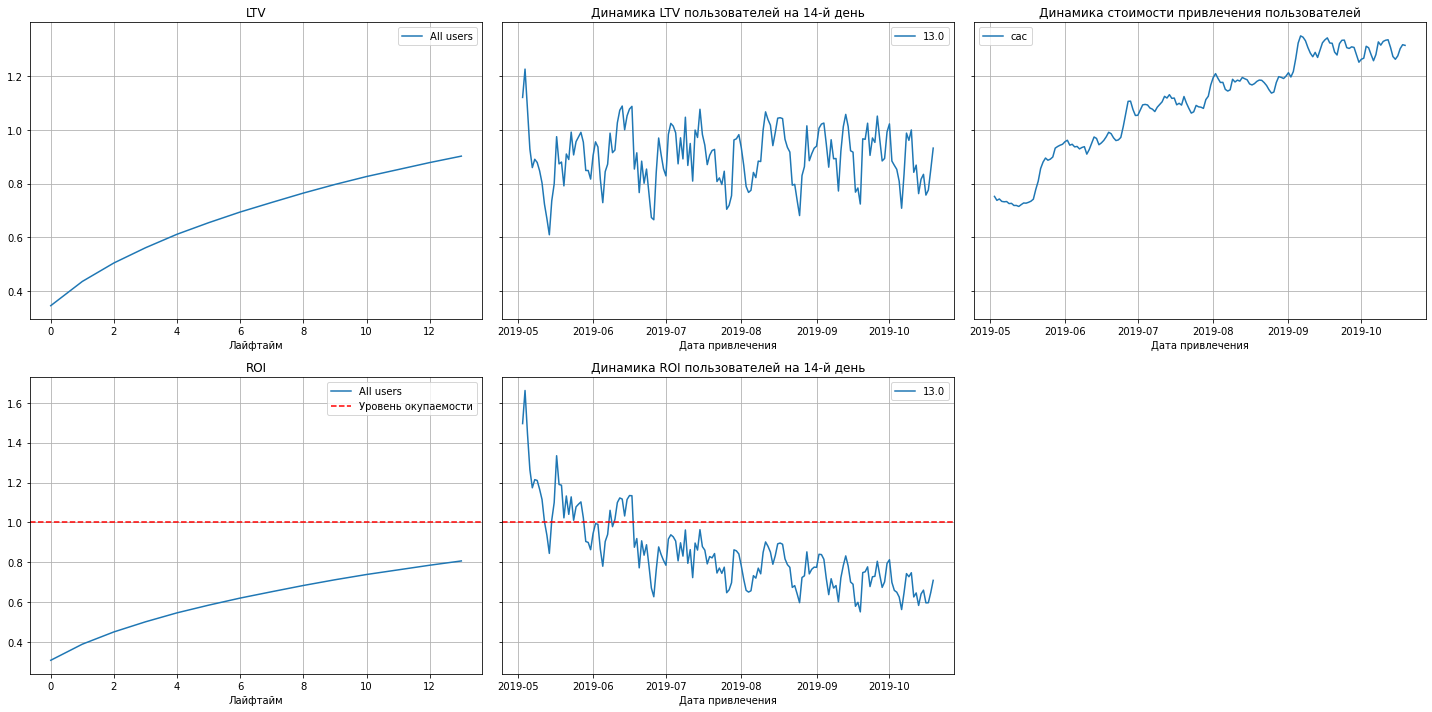

In [32]:
#Воспользуемся функцией plot_ltv_roi для построения графиков LTV, ROI, графиков динамики LTV, CAC и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=3)

Выводы по графикам:
- LTV стабильно растет, достиг значения 0.9, значит выручка увеличивается. 
- CAC вырос с 0.75 - 1.3, значит расходы на рекламу были увеличены.
- Реклама не окупается. ROI в конце второй недели — чуть выше 80%. Сюдя по динамике ROI пользователей 14-го дня, реклама перестала окупаться с конца мая, хотя в первой половине июня была положительная динамика, тренд всё равно остался нисходящим.
---

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — устройству первого посещения, стране, источнику привлечения. 


**Пункт 2.** Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

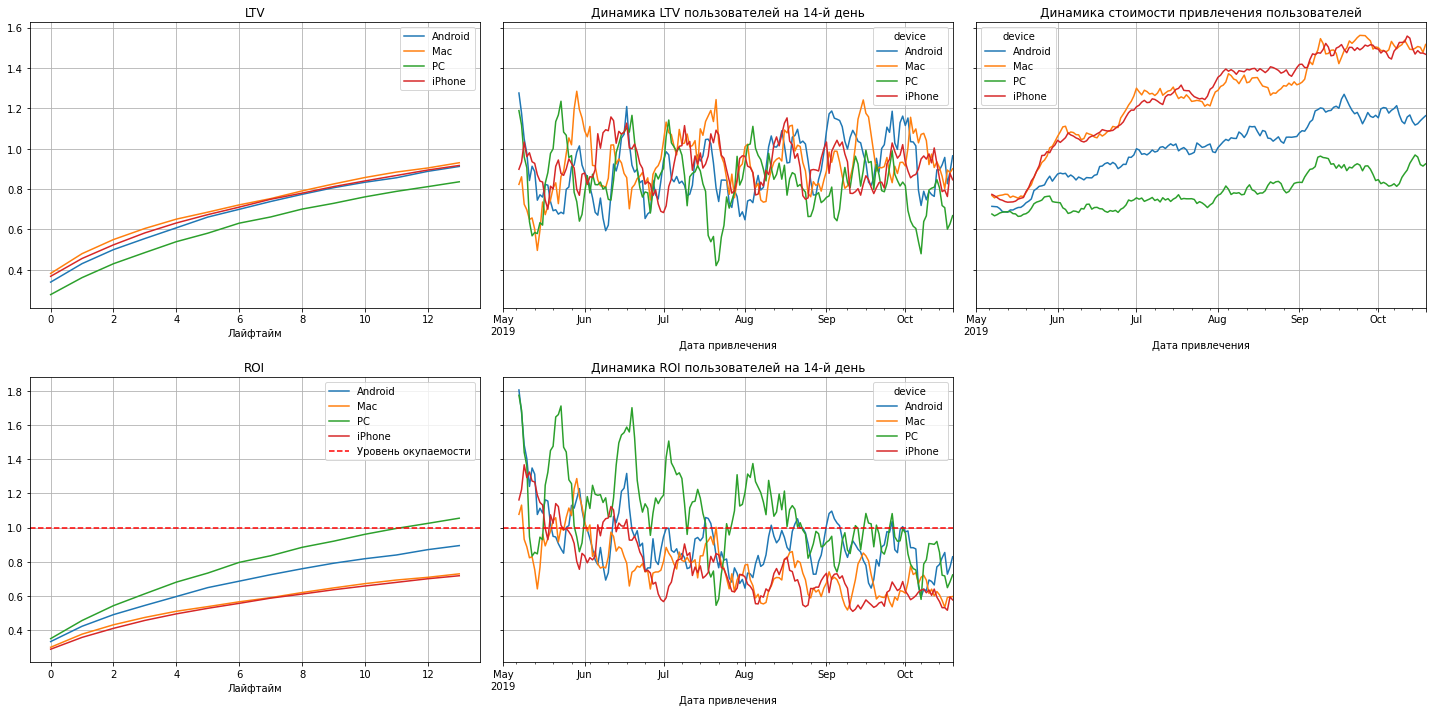

In [33]:
#Воспользуемся функцией get_conversion для расчета таблицы конверсии и динамики конверсии с дополнительным признаком device
ltv_raw, ltv,  ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['device'])

#Воспользуемся функцией plot_ltv_roi для построения графиков LTV, ROI, графиков динамики LTV, CAC и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Пользователи персональных компьютеров (PC) стабильно окупаются, хотя LTV у них одна из самых низких. По остальным устройствам пользователи не окупаются. Самые низкие показатели у Mac и iPhone, по ним же и затраты на рекламу самые высокие. Низкие затраты на рекламу у PC. Это очень странно, будем разбираться дальше. 

---

**Пункт 3.** Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

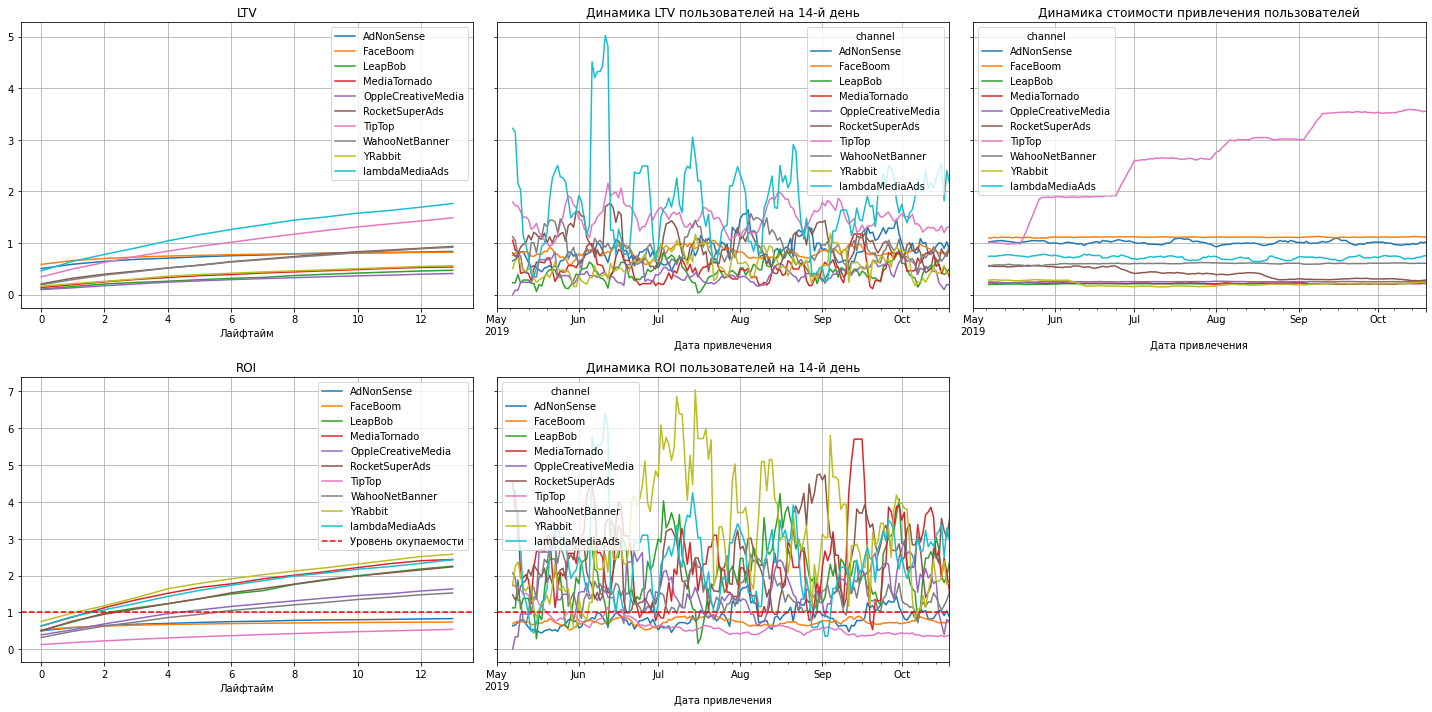

In [34]:
#Воспользуемся функцией get_conversion для расчета таблицы конверсии и динамики конверсии с дополнительным признаком channel
ltv_raw, ltv,  ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['channel'])

#Воспользуемся функцией plot_ltv_roi для построения графиков LTV, ROI, графиков динамики LTV, CAC и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Реклама окупилась по всем каналам, кроме TipTop, FaceBoom, AdNoneSense. А стоимость привлечения пользователей по канулу TipTop оказалась самой высокой. Стоимость росла на протяжении всего периода и увеличилась в 3.5 раза. Хотя «пожизненная ценность» клиента TipTop одна и самых лучших. У канала lambdaMediaAds LTV самый лучший. Лучше всего окупаются каналы YRabbit, MediaTornado, lambdaMediaAds, LeapBob, RocketSuperAds. 

**Пункт  4.** Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

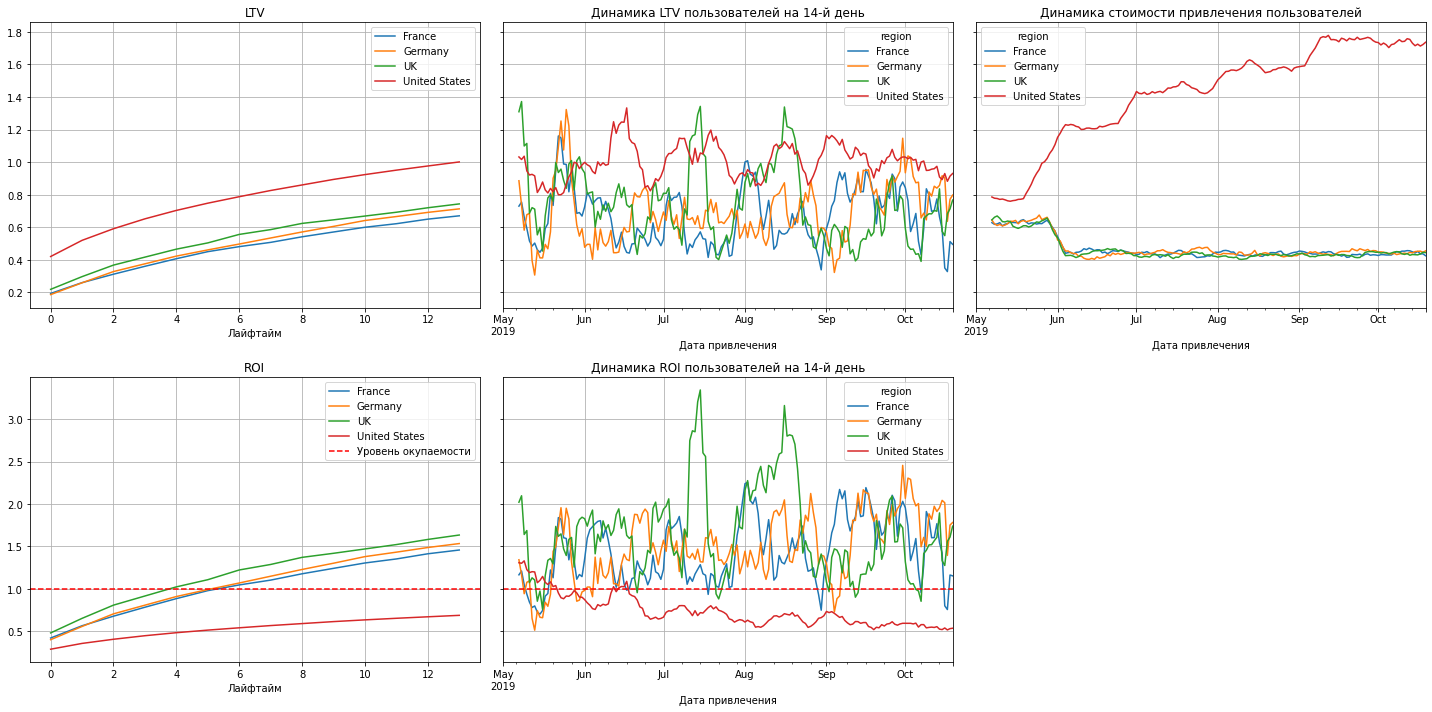

In [35]:
#Воспользуемся функцией get_conversion для расчета таблицы конверсии и динамики конверсии с дополнительным признаком region
ltv_raw, ltv,  ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['region'])

#Воспользуемся функцией plot_ltv_roi для построения графиков LTV, ROI, графиков динамики LTV, CAC и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Реклама окупается во всех странах кроме США. Стоимость привлечения пользователей из США увеличилась более чем вдвое. По остальным странам наоборот снизилась в полтора раза. Показатели качества пользователей(LTV) самые высокие у США, остальные страны явно отстают.
Разбивка по странам выявила явного аутсайдера - США. Причина провала оказалась в стране привлечения. 

---

**Пункт 5.** Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучите графики конверсии и удержания с разбивкой по странам.

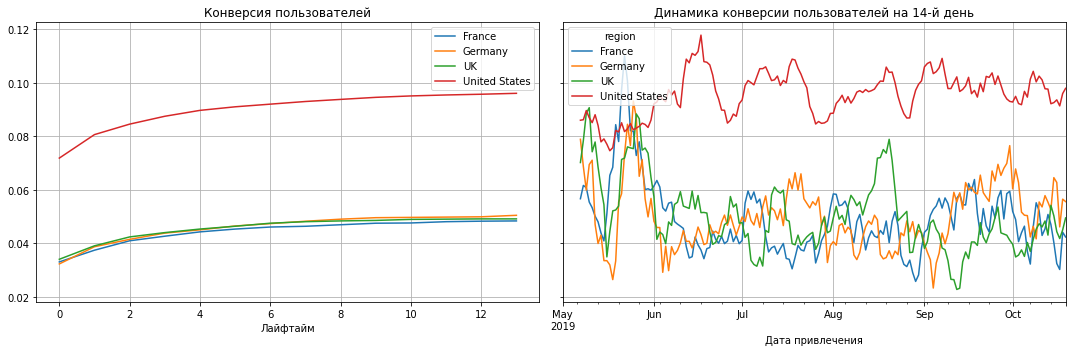

In [36]:
#Воспользуемся функцией get_conversion для расчета таблицы конверсии и динамики конверсии по странам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region']
)

#Воспользуемся функцией plot_conversion для построения графика конверсии
plot_conversion(conversion, conversion_history, horizon_days, window=7)

Показатель конверсии по США самый высокий, динамика конверсии пользователей на 14-й день выглядит нормально. 

---

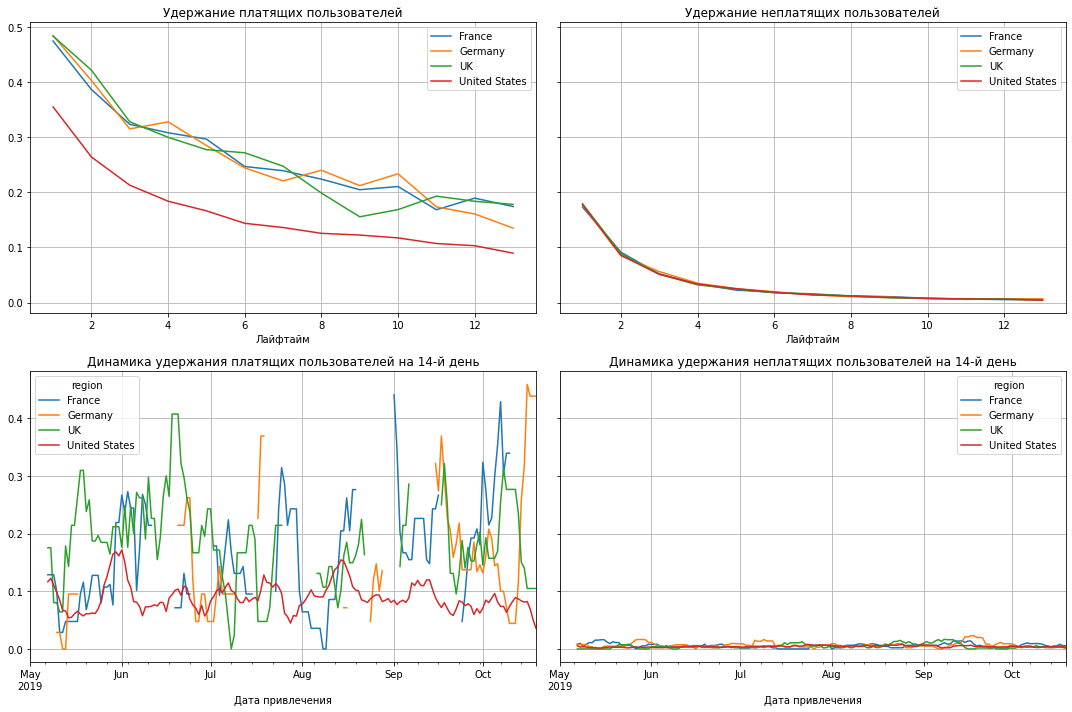

In [37]:
#Воспользуемся функцией get_retention для расчета таблицы удержания и динамики удержания
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region']
)

#Воспользуемся функцией plot_retention для построения графика удержания
plot_retention(retention, retention_history, horizon_days, window=7)

А вот с удержанием проблемы. У США самый низкий показатель удержания платящих пользователей из всех стран. 

---

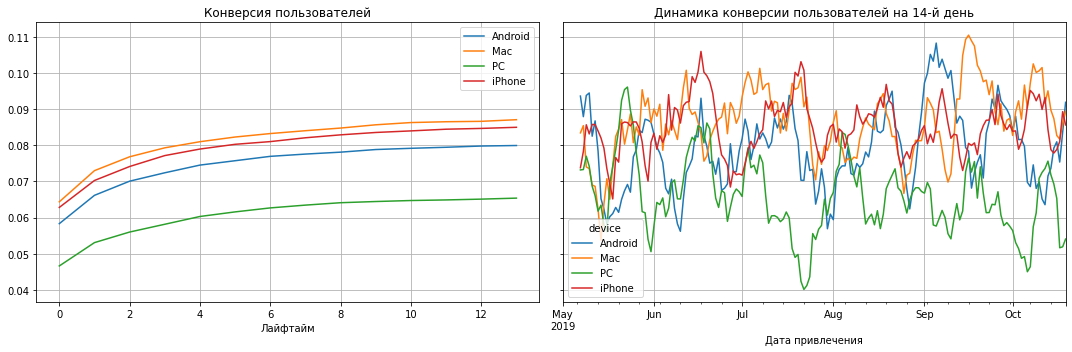

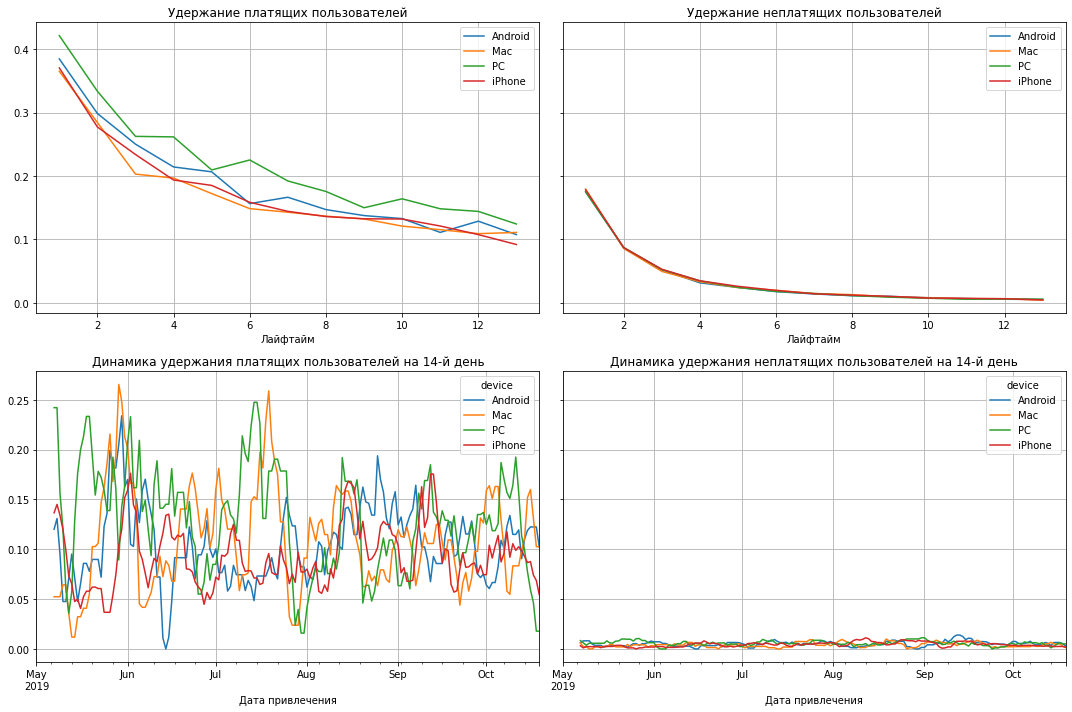

In [38]:
#Воспользуемся функцией get_conversion для расчета таблицы конверсии и динамики конверсии по устройствам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device']
)

plt.show()

#Воспользуемся функцией plot_conversion для построения графика конверсии
plot_conversion(conversion, conversion_history, horizon_days, window=7)

#Воспользуемся функцией get_retention для расчета таблицы удержания и динамики удержания по устройствам
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device']
)

#Воспользуемся функцией plot_retention для построения графика удержания
plot_retention(retention, retention_history, horizon_days, window=7)

Конверсия по устройствам Mac и iPhone наибольшая по отношению к остальным, а вот удержание наименьшее. У устройств Android такая же ситуация, но проявляется в меньшей степени. 

---

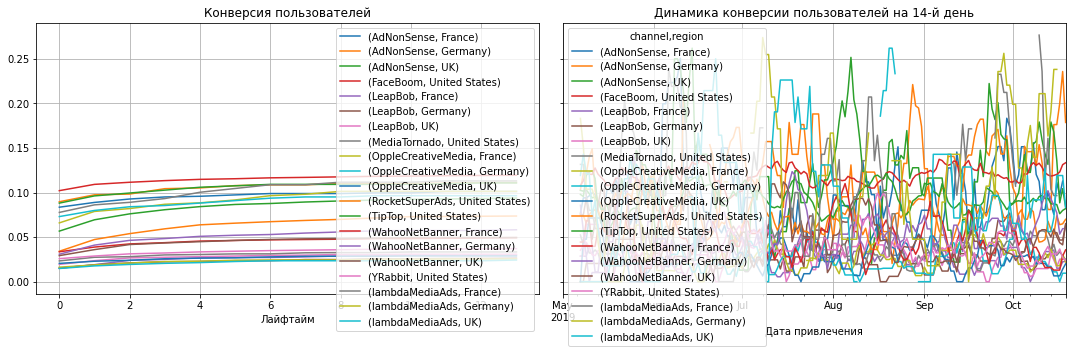

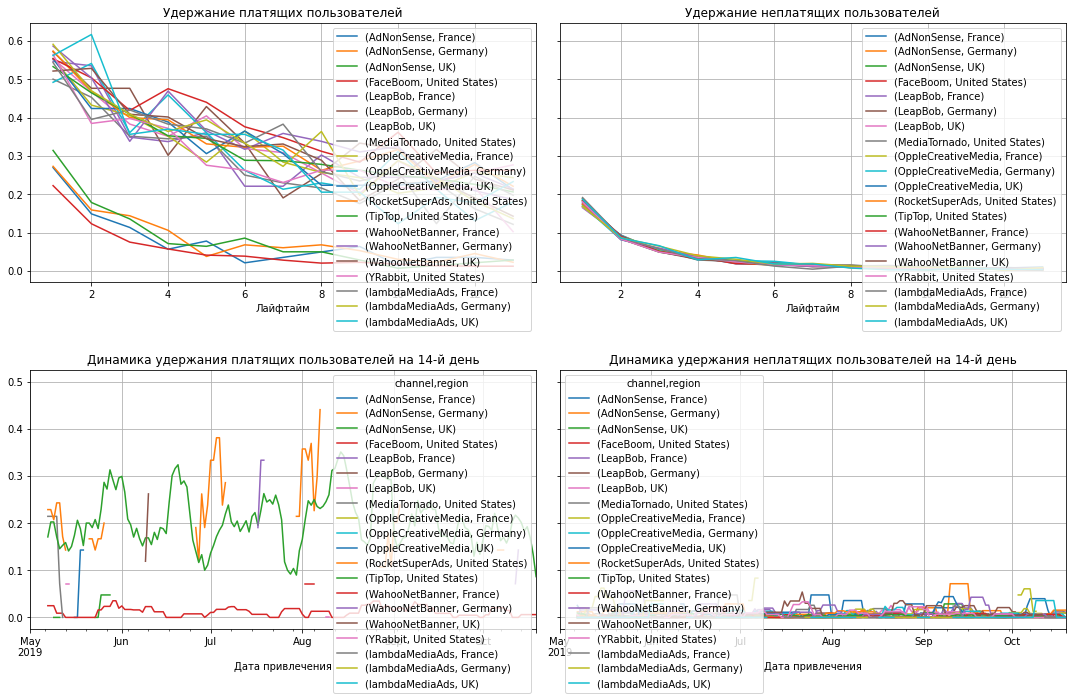

In [39]:
#Воспользуемся функцией get_conversion для расчета таблицы конверсии и динамики конверсии по странам и каналам привлечения
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel', 'region']
)

plt.show()

#Воспользуемся функцией plot_conversion для построения графика конверсии
plot_conversion(conversion, conversion_history, horizon_days, window=7)

#Воспользуемся функцией get_retention для расчета таблицы удержания и динамики удержания по странам и каналам привлечения
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel', 'region']
)

#Воспользуемся функцией plot_retention для построения графика удержания
plot_retention(retention, retention_history, horizon_days, window=7)


In [40]:
#Воспользуемся данными таблицы, чтобы уточнить значения удержания и конверсии по убыточным каналам из разных стран
#Посмотрим конверсию
display(conversion.head())
display()
#Посмотрим на удержание
display(retention.head())

cohort_size       0.0       1.0       2.0       3.0  \
channel    region                                                               
AdNonSense France                1305  0.083525  0.088889  0.092720  0.095019   
           Germany               1160  0.089655  0.097414  0.098276  0.104310   
           UK                    1237  0.088116  0.096200  0.099434  0.102668   
FaceBoom   United States        27544  0.102091  0.109134  0.111494  0.113346   
LeapBob    France                2839  0.015146  0.019021  0.023952  0.025009   

                               4.0       5.0       6.0       7.0       8.0  \
channel    region                                                            
AdNonSense France         0.095785  0.097318  0.098851  0.098851  0.098851   
           Germany        0.105172  0.107759  0.108621  0.108621  0.110345   
           UK             0.105901  0.107518  0.109135  0.109135  0.109135   
FaceBoom   United States  0.114762  0.115452  0.116468  0.116976  0.117557   
LeapBob    France         0.026770  0.027122  0.027122  0.027827  0.028883   

                               9.0      10.0      11.0      12.0      13.0  
channel    region                                                           
AdNonSense France         0.099617  0.099617  0.101149  0.101149  0.101149  
           Germany        0.110345  0.110345  0.110345  0.111207  0.111207  
           UK             0.109135  0.109135  0.109943  0.110752  0.110752  
FaceBoom   United States  0.118175  0.118465  0.118864  0.119082  0.119373  
LeapBob    France         0.029236  0.029588  0.029588  0.029940  0.029940

cohort_size    0         1         2  \
payer channel    region                                                
False AdNonSense France                1164  1.0  0.167526  0.093643   
                 Germany               1028  1.0  0.173152  0.084630   
                 UK                    1097  1.0  0.188696  0.083865   
      FaceBoom   United States        24182  1.0  0.172980  0.087214   
      LeapBob    France                2753  1.0  0.164911  0.090810   

                                       3         4         5         6  \
payer channel    region                                                  
False AdNonSense France         0.051546  0.036082  0.018900  0.016323   
                 Germany        0.052529  0.041829  0.021401  0.018482   
                 UK             0.049225  0.033728  0.024613  0.021878   
      FaceBoom   United States  0.050782  0.032710  0.025267  0.019767   
      LeapBob    France         0.050490  0.032692  0.022884  0.020705   

                                       7         8         9        10  \
payer channel    region                                                  
False AdNonSense France         0.016323  0.013746  0.013746  0.009450   
                 Germany        0.017510  0.008755  0.011673  0.005837   
                 UK             0.016408  0.010939  0.008204  0.002735   
      FaceBoom   United States  0.013605  0.011910  0.010007  0.008064   
      LeapBob    France         0.016709  0.011260  0.011624  0.007265   

                                      11        12        13  
payer channel    region                                       
False AdNonSense France         0.004296  0.007732  0.010309  
                 Germany        0.004864  0.005837  0.007782  
                 UK             0.007293  0.007293  0.001823  
      FaceBoom   United States  0.005500  0.006616  0.004342  
      LeapBob    France         0.006538  0.005085  0.005812

Самые высокие показатели конверсии:
- по каналу FaceBoom по США -11.9%
- по каналу AdNonSense по Франции - 10.1%, Германии - 11.1%, Великобритании - 11.1% 

Самые низкие показатели удержания:
- по каналу FaceBoom по США - 1.5%,
- по каналу AdNonSense по Германии - 2.3%, Франции - 2.8%, Великобритании - 2.9%. 

Во-первых, не все каналы привлечения по США оказались убыточными, только у FaceBoom аоказатели удержания платящих пользователей низкие. Так же интересно, что по канал AdNonSense оказался убыточным по всех странах, кроме США по показателям удержания пользователей. Самое интересное в том, что по данным каналам и странам высокие показатели конверсии, скорее всего мы имеем дело с техническими неполадками. 

---

**Вывод**
1. Реклама, направленная на привлечение пользователей не окупается. Затраты увеличились практически вдвое. А вот качество клиентов стабильно растет.    
2. Самые низкие показатели окупаемости выявлены:
    - по устройства: Mac и iPhone,
    - по рекламным каналам: TipTop(траты на рекламу увеличили в 3,5 раза), FaceBoom, AdNoneSense,
    - по странам - в США.
3. Проблема окупаемости рекламы заключается в низком удержании пользователей по каналам: FaceBoom (в США), AdNonSense (в Германии, Франции, Великобритании). Данные каналы имеют высокие показатели конверсии, поэтому следует более подробно изучить и выявить причины низкого удержания у них.   

**Выводы и рекомендации**

Компанией Procrastinate Pro+ были предоставлены данные с 01.05.2019 по 27.10.2019 для анализа. На этапе подготовки в данных о визитах, заказах и рекламных расходах не выявлено дубликатов и пропусков, типы данных изменены на необходимые для анализа. Предварительно, разработаны функции для подсчета необходимых метрик и их визуализации. Во время исследовательского анализа были составлены профили пользователей с подробной информацией по каналам привлечения, устройствам первого посещения и региону. Регионы привлечения пользователей: США, Германия, Великобритания, Франция. Наибольшая доля платящих пользователей принадлежит США - 5%, по остальным странам 3.8 – 4.1%. Используемые устройства: Mac, iPhone, Android, PC. Доля платящих по устройствам Mac и iPhone 6.2% - 6.4%, а персональные компьютеры (PC) покупатели предпочитают в меньшей степени – 5.1%. Компания использует 11 каналов привлечения пользователей в свое приложение. Большая доля покупателей у следующих каналов: FaceBoom - 12,2%, AdNonSense - 11,3%, lambdaMediaAds - 10,5%. 


Общая сумму рекламных расходов составила 105.5 тыс. Самым дорогим каналом стал TipTop, затраты составили практически половину рекламного бюджета - 55 тыс, следующий за ним FaceBoom - 32 тыс. У остальных каналов привлечения значения расходов не превышают 6 тыс. По динамике расходы на рекламу канала TipTop выросли в 4.5 раза, канала FaceBoom вдвое. По каналам AdNonSense, lambdaMediaAds, RocketSuperAds, YRabbit, MediaTornado затраты наоборот снизились. Самые дорогие пользователи пришли из канала TipTop - 2.8.


Следует присмотреться к следующим каналам, как к перспективным:
- AdNonSense: с начала рекламной кампании затраты снизились вдвое, суммарно составили 3.9 тыс., доля покупателей - 11%;
- lambdaMediaAds: с начала рекламной кампании затраты снизились вдвое, составили суммарно 1.5 тыс., доля покупателей - 10.5%;
- RocketSuperAds: с начала рекламной кампании затраты снизились вдвое, составили суммарно 1.8 тыс., доля покупателей - 8%.


Для оценки окупаемости рекламы момент анализа - 1 ноября 2019 года, горизонт анализа - 14 дней, так как в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Анализ проводился без данных по органическим пользователям, так как затрат на их привлечение не было.


Реклама, направленная на привлечение пользователей, не окупается. ROI в конце второй недели — чуть выше 80%. Затраты на рекламу выросли практически вдвое (CAC).  А вот качество пользователей (LTV) стабильно растет. 

Анализ окупаемости рекламы по устройствам выявил: пользователи PC стабильно окупаются, имея самый низкий показатель качества клиентов и минимальную стоимость привлечения пользователей. Обратная ситуация с устройствами Mac и iPhone – реклама не окупается, стоимость привлечения высокая. Реклама на Android не окупается, стоимость привлечения – средняя. Дополнительные расчеты конверсии и удержания с разбивкой по устройствам выявили аномалию: конверсия по устройствам Mac и iPhone наибольшая по отношению к остальным, а вот удержание наименьшее. У устройств Android такая же ситуация, но проявляется в меньшей степени. Такая ситуация свидетельствует о технических проблемах. Необходимо изучить работу рекламной кампании на устройствах Mac, iPhone, Android. 

Анализ окупаемости по странам выявил: реклама окупилась во всех странах, кроме США. Более того стоимость привлечения пользователей по США увеличилась более чем вдвое, а по остальным странам наоборот снизилась в полтора раза. Следует также заметить, что у США самая высокая конверсия, а вот с удержанием платящих пользователей проблемы. Данная ситуация неоднозначна. В связи с этим был дополнительно проведен анализ конверсии и удержания по каналам и странам привлечения пользователей. Результаты следующие:
Самые высокие показатели конверсии:
•	по каналу FaceBoom по США -11.9%
•	по каналу AdNonSense по Франции - 10.1%, Германии - 11.1%, Великобритании - 11.1%
Самые низкие показатели удержания:
•	по каналу FaceBoom по США - 1.5%,
•	по каналу AdNonSense по Германии - 2.3%, Франции - 2.8%, Великобритании - 2.9%.
Не все каналы привлечения по США оказались убыточными, проблемы обнаружены с каналом FaceBoom. Так же интересно, что по канал AdNonSense оказался убыточным по всех странах, кроме США по показателям удержания пользователей. Данный факт следует также изучить дополнительно. Самое интересное в том, что по данным каналам и странам высокие показатели конверсии, скорее всего мы имеем дело с техническими неполадками.

Отдельный анализ окупаемости рекламы по каналам выявил лидиров по окупаемости: YRabbit, MediaTornado, lambdaMediaAds, LeapBob, RocketSuperAds. А вот каналы TipTop, FaceBoom, AdNoneSense совсем не окупились. Максимальная стоимость привлечения пользователей у канула TipTop, увеличились в 3.5 раза, хотя качество пользователей TipTop одно и самых лучших. 

Отделу маркетинга следует обратить внимание на работу с пользователями из США по каналу привлечения FaceBoom. Также проверить канал привлечения AdNonSense по Германии, Франции и Великобритании. Возможно, есть технические проблемы с рассылками и спецпредложениями на устройсва Mac и iPhone, Android, они некорректно отражаются на устройствах, что влияет на их удержание. Затраты по каналам привлечение так же стоит пересмотреть. Увеличить рекламный бюджет по YRabbit, MediaTornado, lambdaMediaAds, LeapBob, RocketSuperAds, снизить затраты по TipTop, FaceBoom, AdNoneSense. 
